In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

C:\Users\Admin\AppData\Local\Temp\ipykernel_2564\2188477860.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [3]:
def buildAndTrainTheModel(x, y):

    #build the model
    ANNreg = nn.Sequential(
        nn.Linear(1, 1), # input layer; (1, 1) = takes one input(x) and produces one output(input of 2nd linear function) 
        nn.ReLU(), # activation function
        nn.Linear(1, 1) # output layer (1, 1) = takes one input(output  of first linear function) and produces one output(y)
    )

    # learning rate
    learningRate = .05
    
    # loss function
    lossfun = nn.MSELoss()
    
    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

    # train the model
    numepochs = 500
    losses = torch.zeros(numepochs)
    
    # train the model
    for epochi in range(numepochs):
    
        # forward pass
        yHat = ANNreg(x)
    
        # compute loss
        loss = lossfun(yHat, y)
        losses[epochi] = loss
    
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # end training loop

    # compute model predictions
    predictions = ANNreg(x)
    
    # output:
    return predictions,losses

In [4]:
# function to create the data
def createTheData(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N, 1)/2
    return x, y

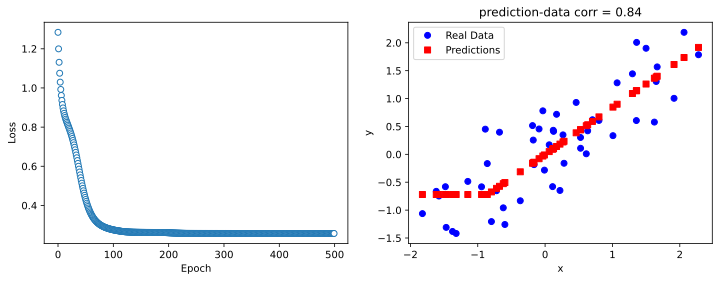

In [8]:
# test it once

# create a dataset
x, y = createTheData(.8)

# run the model
yHat, losses = buildAndTrainTheModel(x, y)

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(losses.detach(), "o", markerfacecolor = "w", linewidth = 1)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(x, y, "bo", label = "Real Data")
ax[1].plot(x, yHat.detach().numpy(), "rs", label="Predictions")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title(f"prediction-data corr = {np.corrcoef(y.T, yHat.detach().numpy().T)[0, 1]:.2f}")
ax[1].legend()

plt.show()

In [9]:
# the slopes to simulate
slopes = np.linspace(-2, 2, 21)

numExps = 50

# initialize the output matrix
results = np.zeros((len(slopes), numExps, 2))

for slopei in range(len(slopes)):

    for N in range(numExps):

        # create a dataset and run the model
        x, y = createTheData(slopes[slopei])
        yHat, losses = buildAndTrainTheModel(x, y)

        # store the final loss and performance
        results[slopei, N, 0] = losses[-1]
        results[slopei, N, 1] = np.corrcoef(y.T, yHat.detach().T)[0, 1]

# correlation can be 0 if the model didn't do well. Set nan's -> 0
results[np.isnan(results)] = 0

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


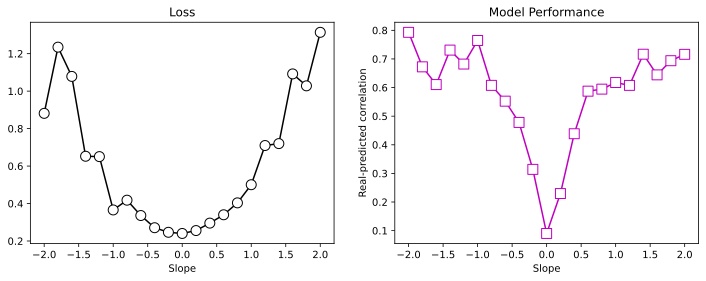

In [10]:
# plot the results

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(slopes, np.mean(results[:,:,0], axis = 1), "ko-", markerfacecolor = "w", markersize = 10)
ax[0].set_xlabel("Slope")
ax[0].set_title("Loss")

ax[1].plot(slopes, np.mean(results[:,:,1], axis = 1), "ms-", markerfacecolor = "w", markersize = 10)
ax[1].set_xlabel("Slope")
ax[1].set_ylabel("Real-predicted correlation")
ax[1].set_title("Model Performance")

plt.show()